# Breast Cancer Detection using Support Vector Machine

## Overview

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumours that can be seen via X-ray or felt as lumps in the breast area.


## Objective

The key challenge against its detection is how to classify tumours into malignant (cancerous) or benign(non-cancerous). I will complete the analysis of classifying these tumours using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.
Since the labels in the data are discrete, the predication falls into two categories, (i.e., Malignant or benign). In machine learning, this is a classification problem.
Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this, we have used machine learning classification methods to fit a function that can predict the discrete class of new input.


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We have a column named unnamed: 32 lets see what it is

In [4]:
data.loc[:, "Unnamed: 32"].isnull().sum()

569

This column is redundant we do not need it at all. We will drop it.

In [5]:
# dropping the last column
data.drop('Unnamed: 32', axis=1, inplace = True)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#checking if that column is succesfully dropped
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Unnamed: 32 successfully dropped!

#### Column Informations and some basic stats

- info on the columns
- shape of the data set
- check for null values

In [8]:
#info on the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We have 30 columns, all are float data type and are not null.

In [9]:
# shape of the dataset
data.shape

(569, 32)

569 rows and 32 columns

In [10]:
#check for null values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Looks good no null values to deal with!

Alright our data looks good, diagnosis is the only column which is categorical, since we cannot use categorical variables for our machine learning models we will use Scaling techniques to convert the diagnosis column into numerical values. We are now ready to proceed with our exploratory data analysis. Let's get our hands dirty!

# Exploratory Data Analysis

### 1. Univariate Analysis

In [11]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [12]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
data.skew()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

In [14]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [15]:
diag = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


We have 357 cases where tumor is benign and 212 cases where tumor is malignant

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

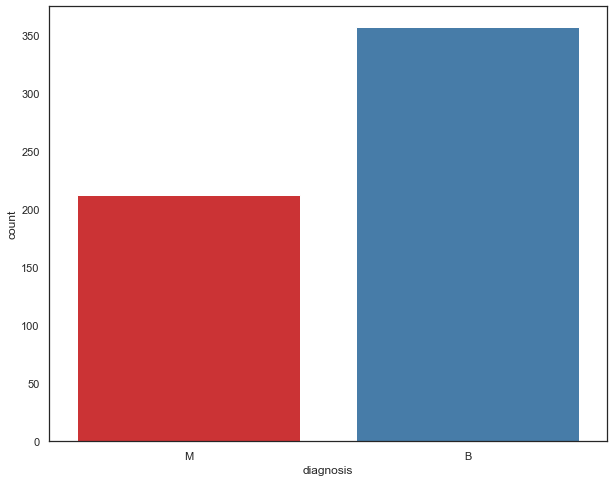

In [16]:
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(data['diagnosis'],label='Count',palette="Set1")

Gives us an idea of how the number of cases fare against each other`

In [17]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

- If we look closely at the columns, we can notice that the columns are grouped as 'mean' 'se' and 'worst' variables of the different parameters. So before we plot any kind of visual graphs let us first break those columns in to three groups of 'mean', 'se' and 'worst'.
- Columns 3 to 12 contain information relating to the mean value of the tumor dimensions.
- 13 to 22 contain information relating to the se value of the tumor dimension.
- 22 to 32 contain information relating to the worst value of the tumor dimension.

In [18]:
data_id_diag=data.loc[:,["id","diagnosis"]]
data_diag=data.loc[:,["diagnosis"]]

#For a merge + slice:
data_mean=data.iloc[:,2:12]
data_se=data.iloc[:,12:22]
data_worst=data.iloc[:,22:]

print(data_id_diag.columns)

Index(['id', 'diagnosis'], dtype='object')


In [19]:
data_mean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [20]:
data_se.head()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [21]:
data_worst.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Box Plots for the categories

- worst perimeters 

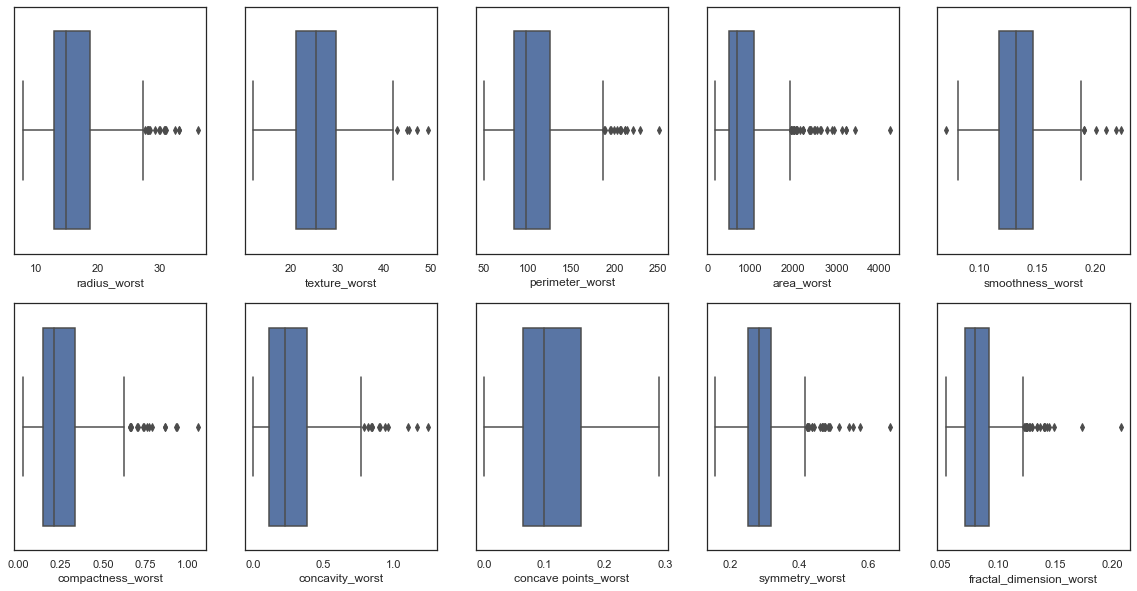

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
sns.boxplot(ax=axes[0, 0], data=data_worst, x='radius_worst')
sns.boxplot(ax=axes[0, 1], data=data_worst, x='texture_worst')
sns.boxplot(ax=axes[0, 2], data=data_worst, x='perimeter_worst')
sns.boxplot(ax=axes[0, 3], data=data_worst, x='area_worst')
sns.boxplot(ax=axes[0, 4], data=data_worst, x='smoothness_worst')
sns.boxplot(ax=axes[1, 0], data=data_worst, x='compactness_worst')
sns.boxplot(ax=axes[1, 1], data=data_worst, x='concavity_worst')
sns.boxplot(ax=axes[1, 2], data=data_worst, x='concave points_worst')
sns.boxplot(ax=axes[1, 3], data=data_worst, x='symmetry_worst')
sns.boxplot(ax=axes[1, 4], data=data_worst, x='fractal_dimension_worst')           
plt.show()

- se perimeters

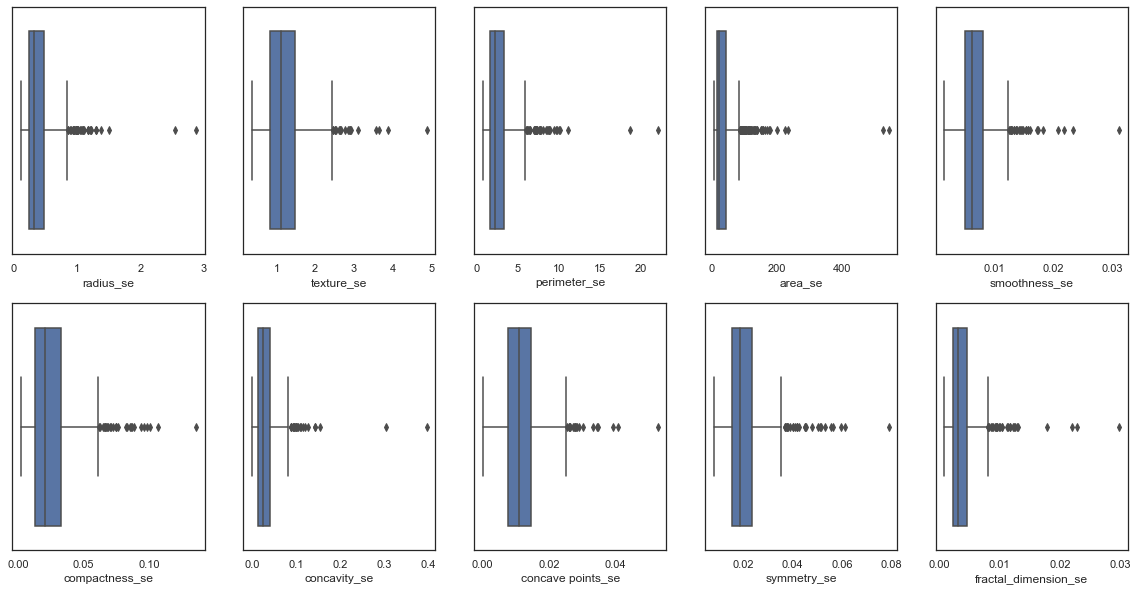

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
sns.boxplot(ax=axes[0, 0], data=data_se, x='radius_se')
sns.boxplot(ax=axes[0, 1], data=data_se, x='texture_se')
sns.boxplot(ax=axes[0, 2], data=data_se, x='perimeter_se')
sns.boxplot(ax=axes[0, 3], data=data_se, x='area_se')
sns.boxplot(ax=axes[0, 4], data=data_se, x='smoothness_se')
sns.boxplot(ax=axes[1, 0], data=data_se, x='compactness_se')
sns.boxplot(ax=axes[1, 1], data=data_se, x='concavity_se')
sns.boxplot(ax=axes[1, 2], data=data_se, x='concave points_se')
sns.boxplot(ax=axes[1, 3], data=data_se, x='symmetry_se')
sns.boxplot(ax=axes[1, 4], data=data_se, x='fractal_dimension_se')           
plt.show()

- mean parameters

- Worst parameter

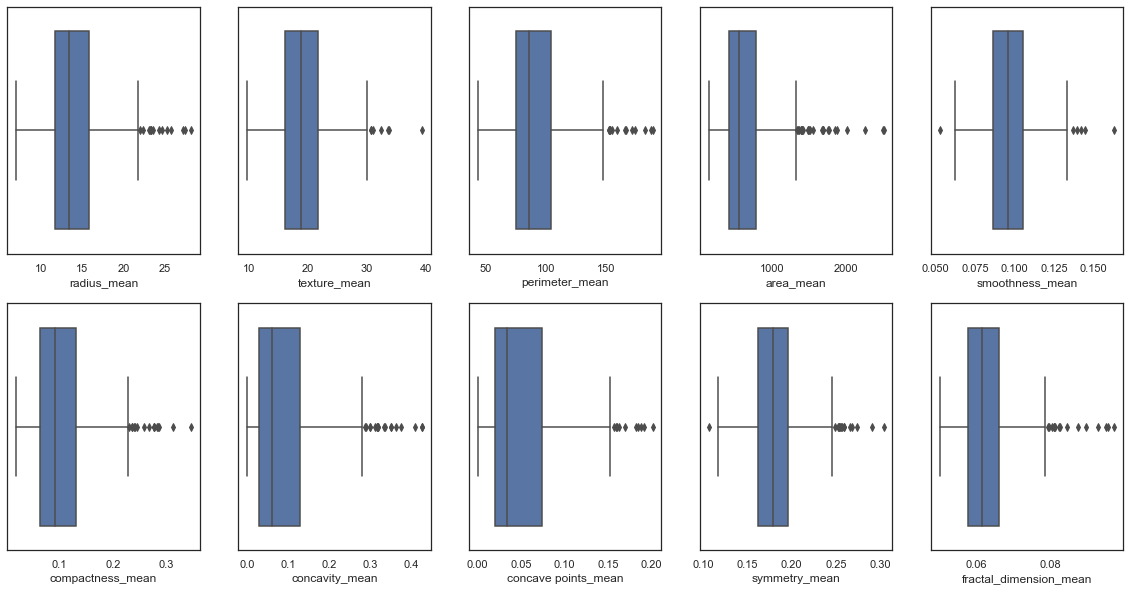

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
sns.boxplot(ax=axes[0, 0], data=data_mean, x='radius_mean')
sns.boxplot(ax=axes[0, 1], data=data_mean, x='texture_mean')
sns.boxplot(ax=axes[0, 2], data=data_mean, x='perimeter_mean')
sns.boxplot(ax=axes[0, 3], data=data_mean, x='area_mean')
sns.boxplot(ax=axes[0, 4], data=data_mean, x='smoothness_mean')
sns.boxplot(ax=axes[1, 0], data=data_mean, x='compactness_mean')
sns.boxplot(ax=axes[1, 1], data=data_mean, x='concavity_mean')
sns.boxplot(ax=axes[1, 2], data=data_mean, x='concave points_mean')
sns.boxplot(ax=axes[1, 3], data=data_mean, x='symmetry_mean')
sns.boxplot(ax=axes[1, 4], data=data_mean, x='fractal_dimension_mean')           
plt.show()

Not much information can be concluded with the box plots, we need other visualisations

#### Let us plot a kde of the three different catgories

In [25]:
# 'radius_worst', 'texture_worst',
#        'perimeter_worst', 'area_worst', 'smoothness_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'fractal_dimension_worst'

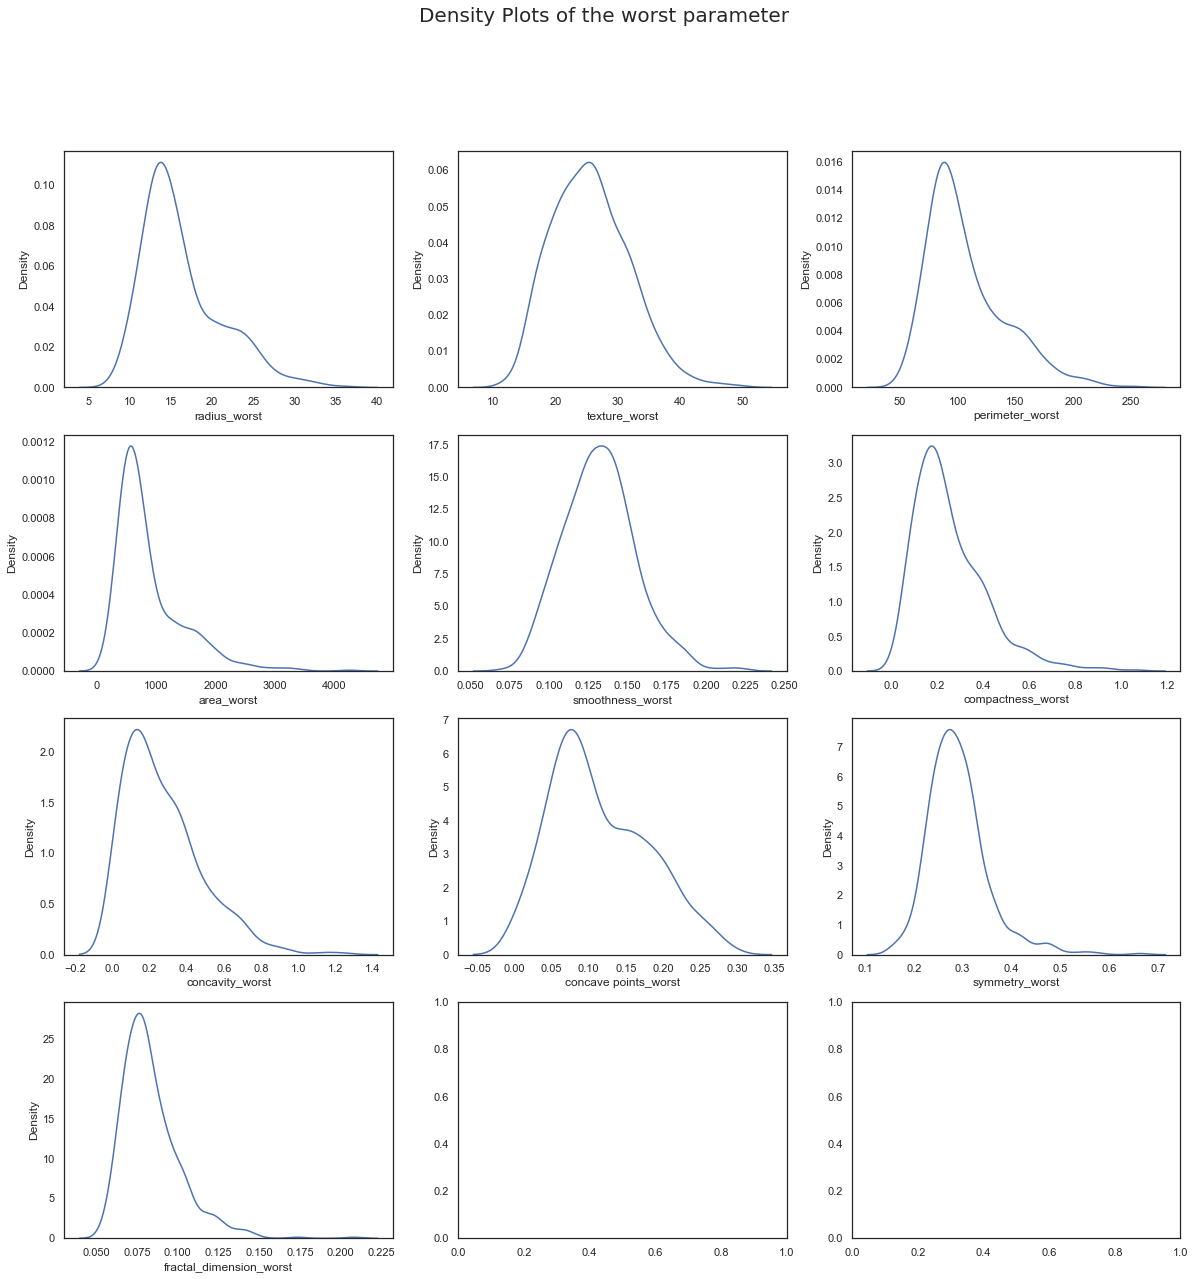

In [26]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Density Plots of the worst parameter', fontsize = '20', fontfamily='DejaVu Sans')
sns.kdeplot(ax=axes[0, 0], data=data_worst, x='radius_worst')
sns.kdeplot(ax=axes[0, 1], data=data_worst, x='texture_worst')
sns.kdeplot(ax=axes[0, 2], data=data_worst, x='perimeter_worst')
sns.kdeplot(ax=axes[1, 0], data=data_worst, x='area_worst')
sns.kdeplot(ax=axes[1, 1], data=data_worst, x='smoothness_worst')
sns.kdeplot(ax=axes[1, 2], data=data_worst, x='compactness_worst')
sns.kdeplot(ax=axes[2, 0], data=data_worst, x='concavity_worst')
sns.kdeplot(ax=axes[2, 1], data=data_worst, x='concave points_worst')
sns.kdeplot(ax=axes[2, 2], data=data_worst, x='symmetry_worst')
sns.kdeplot(ax=axes[3, 0], data=data_worst, x='fractal_dimension_worst')
plt.show()


Density plot of the mean parameters

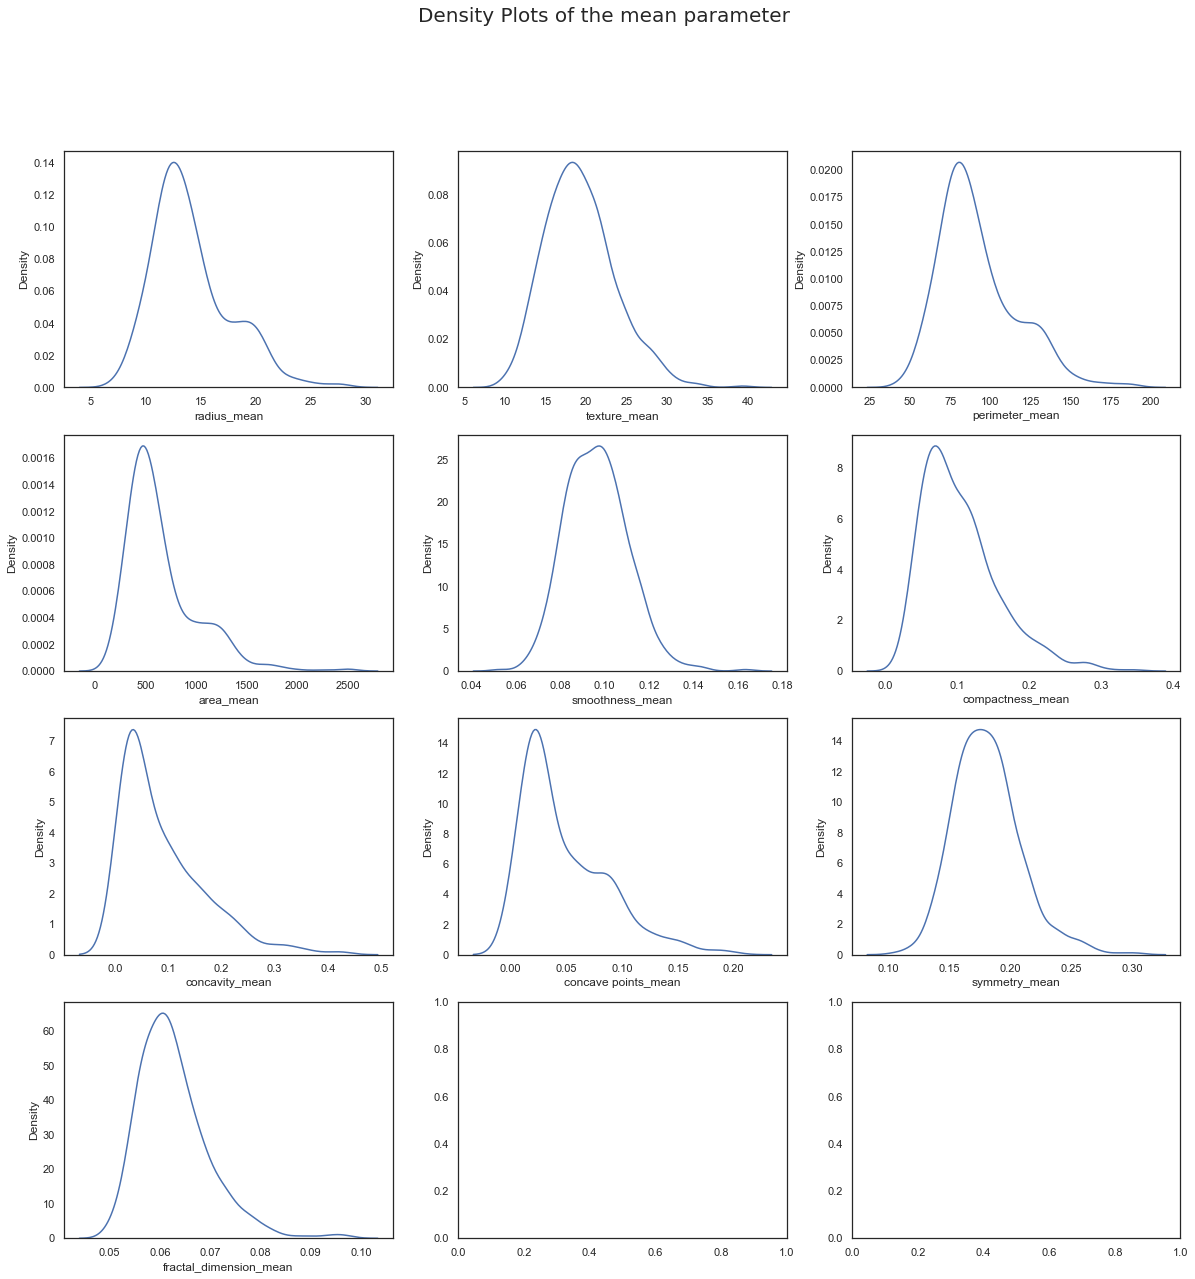

In [27]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
sns.kdeplot(ax=axes[0, 0], data=data_mean, x='radius_mean')
sns.kdeplot(ax=axes[0, 1], data=data_mean, x='texture_mean')
sns.kdeplot(ax=axes[0, 2], data=data_mean, x='perimeter_mean')
sns.kdeplot(ax=axes[1, 0], data=data_mean, x='area_mean')
sns.kdeplot(ax=axes[1, 1], data=data_mean, x='smoothness_mean')
sns.kdeplot(ax=axes[1, 2], data=data_mean, x='compactness_mean')
sns.kdeplot(ax=axes[2, 0], data=data_mean, x='concavity_mean')
sns.kdeplot(ax=axes[2, 1], data=data_mean, x='concave points_mean')
sns.kdeplot(ax=axes[2, 2], data=data_mean, x='symmetry_mean')
sns.kdeplot(ax=axes[3, 0], data=data_mean, x='fractal_dimension_mean')
fig.suptitle('Density Plots of the mean parameter', fontsize = '20', fontfamily='DejaVu Sans')
plt.show()


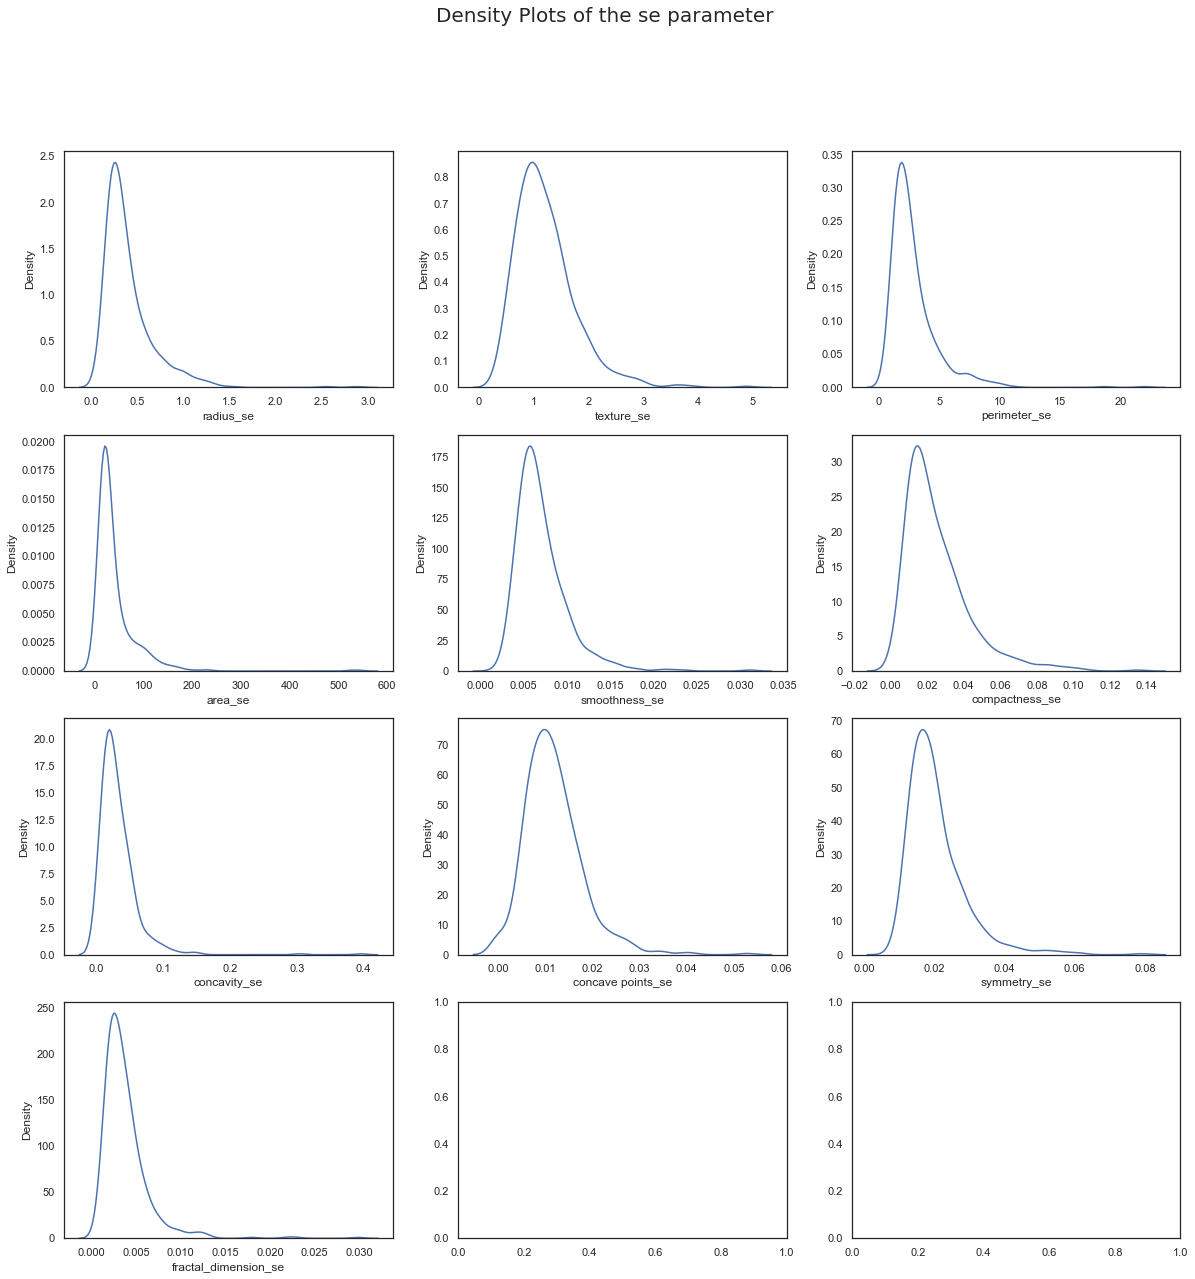

In [28]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
sns.kdeplot(ax=axes[0, 0], data=data_se, x='radius_se')
sns.kdeplot(ax=axes[0, 1], data=data_se, x='texture_se')
sns.kdeplot(ax=axes[0, 2], data=data_se, x='perimeter_se')
sns.kdeplot(ax=axes[1, 0], data=data_se, x='area_se')
sns.kdeplot(ax=axes[1, 1], data=data_se, x='smoothness_se')
sns.kdeplot(ax=axes[1, 2], data=data_se, x='compactness_se')
sns.kdeplot(ax=axes[2, 0], data=data_se, x='concavity_se')
sns.kdeplot(ax=axes[2, 1], data=data_se, x='concave points_se')
sns.kdeplot(ax=axes[2, 2], data=data_se, x='symmetry_se')
sns.kdeplot(ax=axes[3, 0], data=data_se, x='fractal_dimension_se')
fig.suptitle('Density Plots of the se parameter', fontsize = '20', fontfamily='DejaVu Sans')
plt.show()


Let us plot the histplots fro further understanding

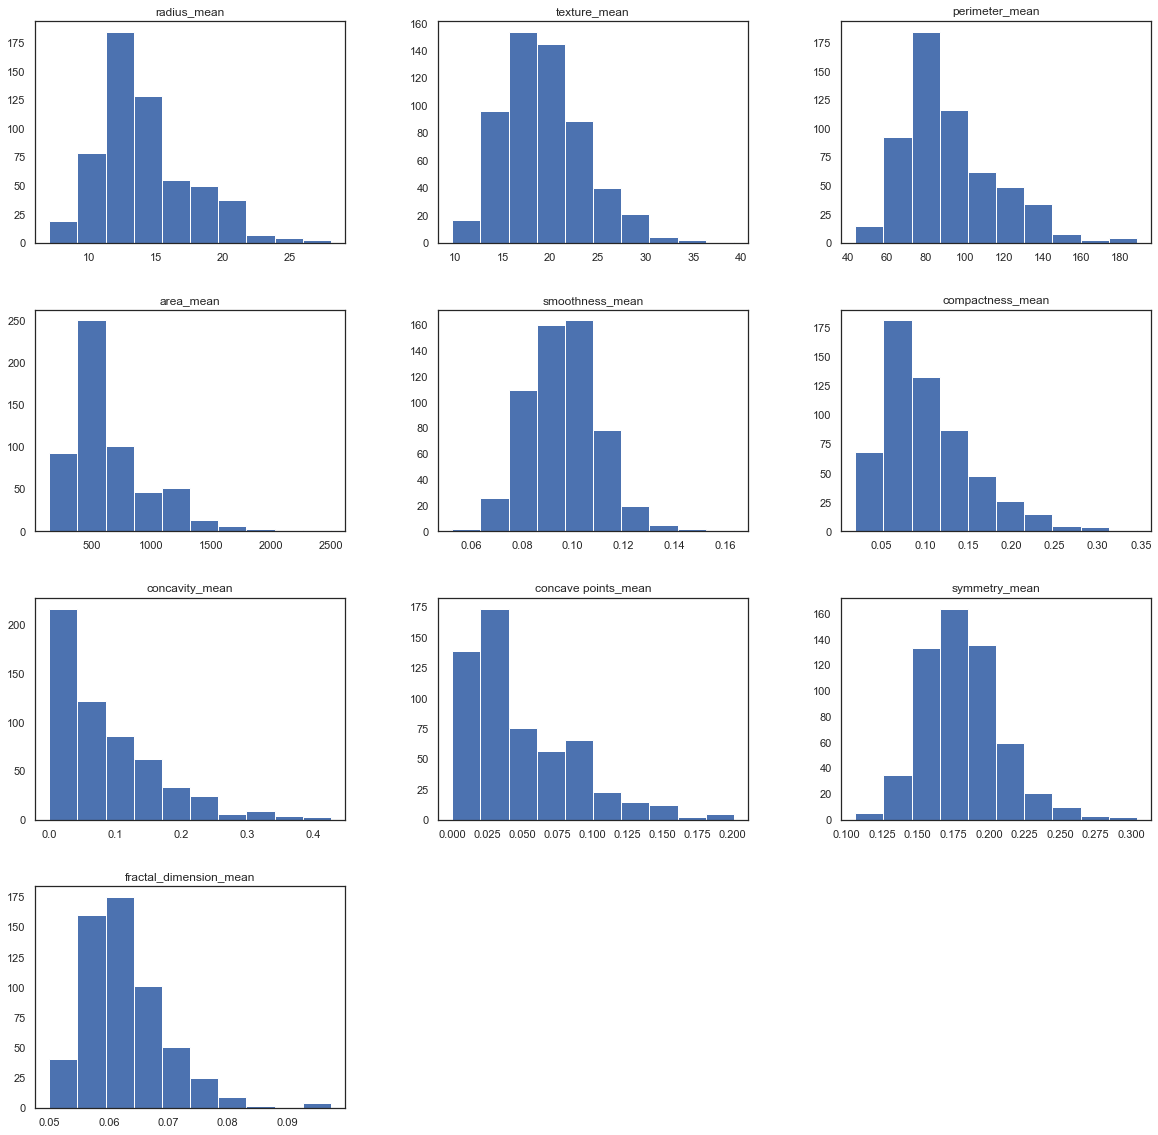

In [29]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(20, 20),grid=False)

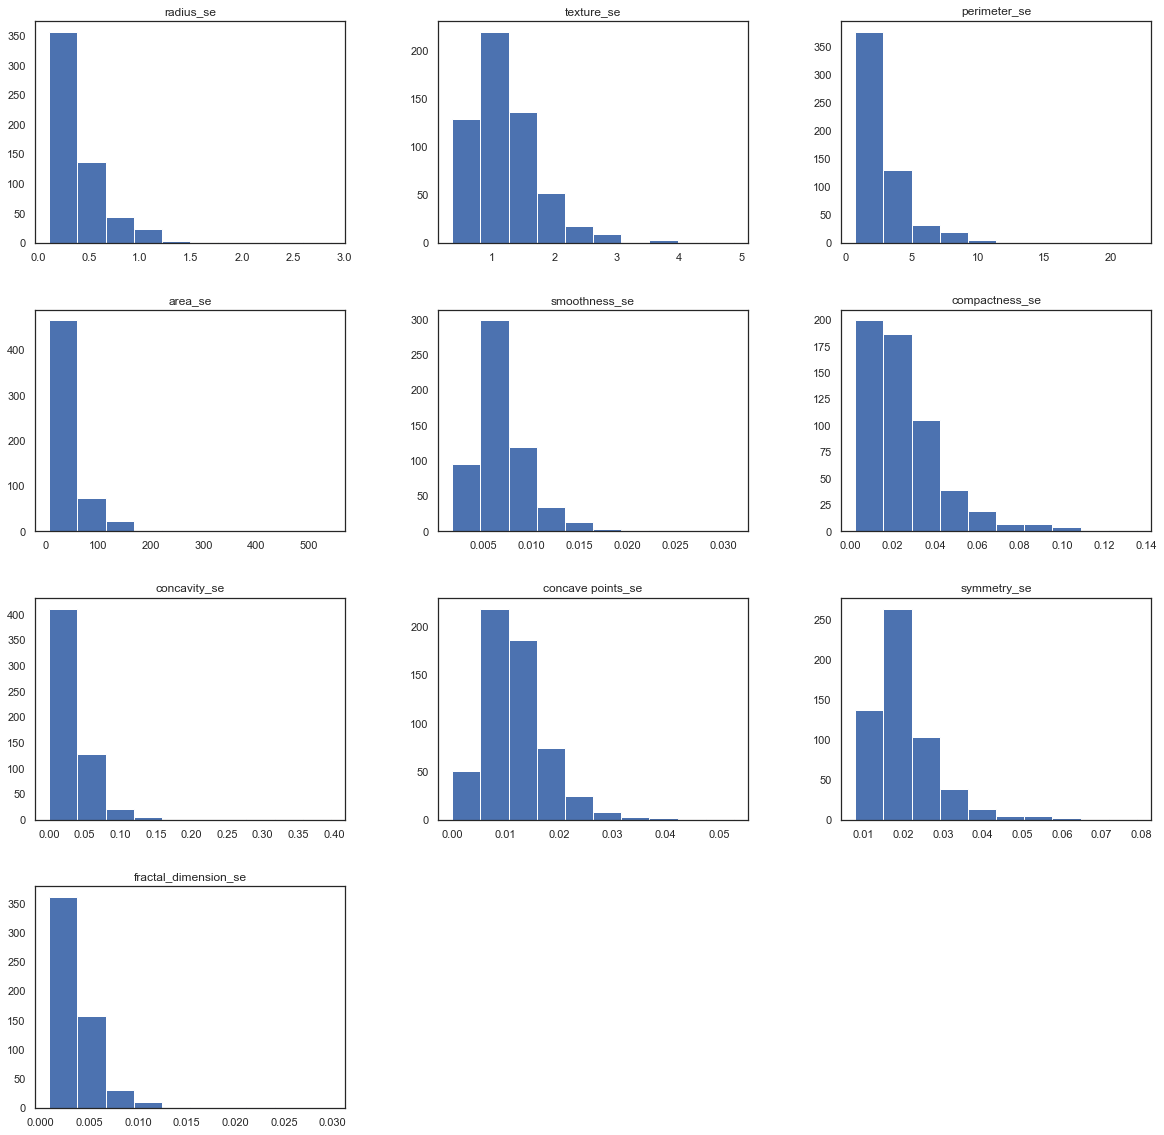

In [30]:
hist_mean=data_se.hist(bins=10, figsize=(20, 20),grid=False)

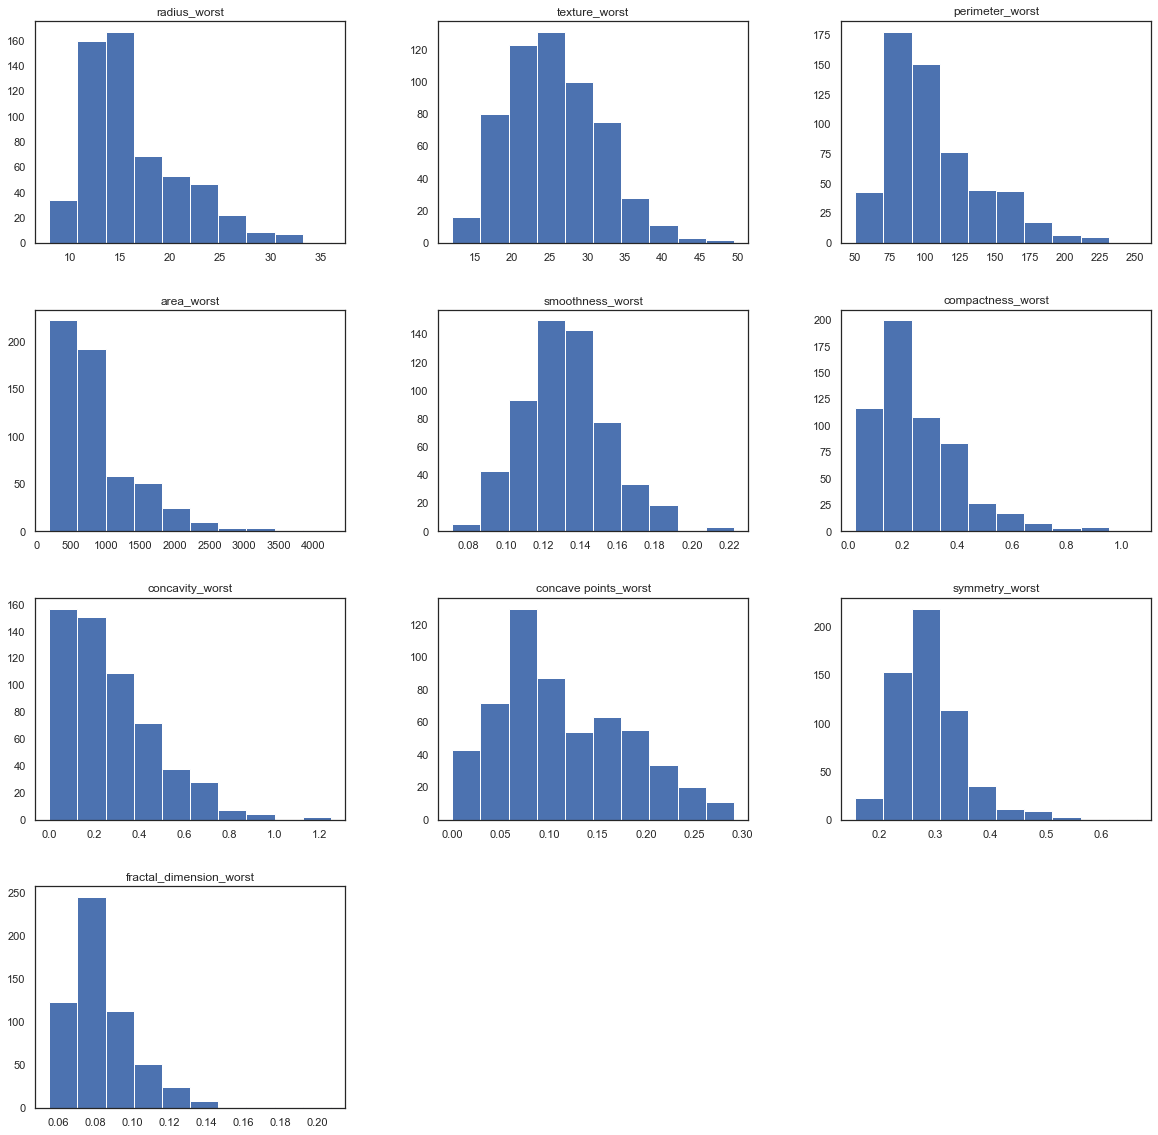

In [31]:
hist_mean=data_worst.hist(bins=10, figsize=(20, 20),grid=False)

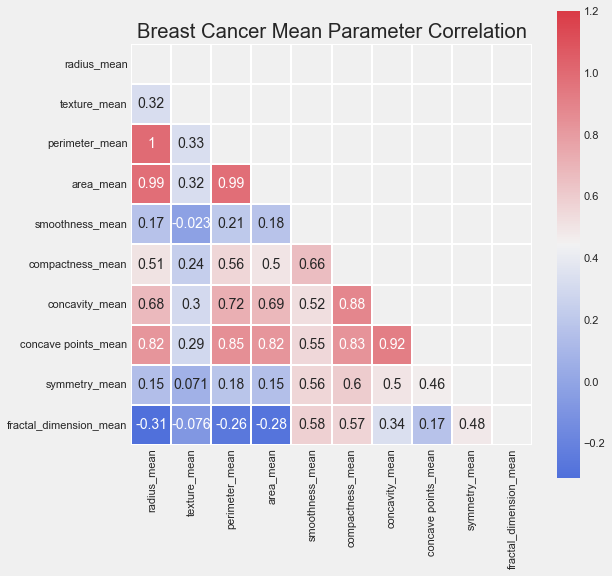

In [32]:
plt.style.use('fivethirtyeight')
corr = data_mean.corr()
df, ax = plt.subplots(figsize=(8, 8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(260, 10, as_cmap=True)
plt.title('Breast Cancer Mean Parameter Correlation')

sns.heatmap(corr, vmax=1.2, square='square',  
            ax=ax,annot=True, fmt='.2g',linewidths=2,
           mask = mask, cmap = cmap)
plt.show()

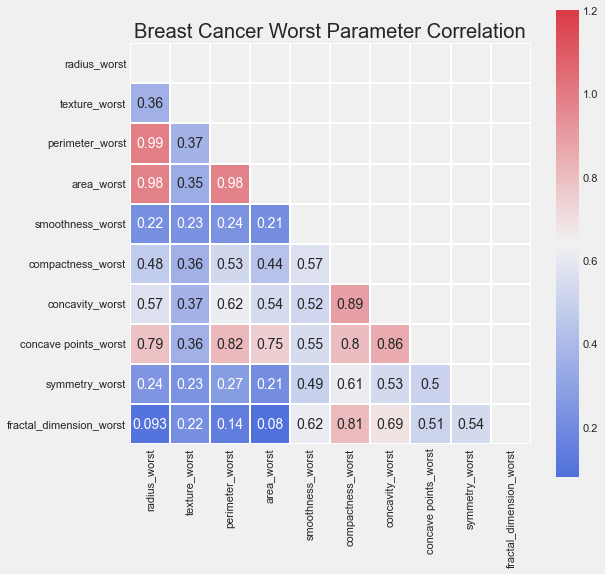

In [33]:
plt.style.use('fivethirtyeight')
corr = data_worst.corr()
df, ax = plt.subplots(figsize=(8, 8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(260, 10, as_cmap=True)
plt.title('Breast Cancer Worst Parameter Correlation')

sns.heatmap(corr, vmax=1.2, square='square',  
            ax=ax,annot=True, fmt='.2g',linewidths=2,
           mask = mask, cmap = cmap)
plt.show()

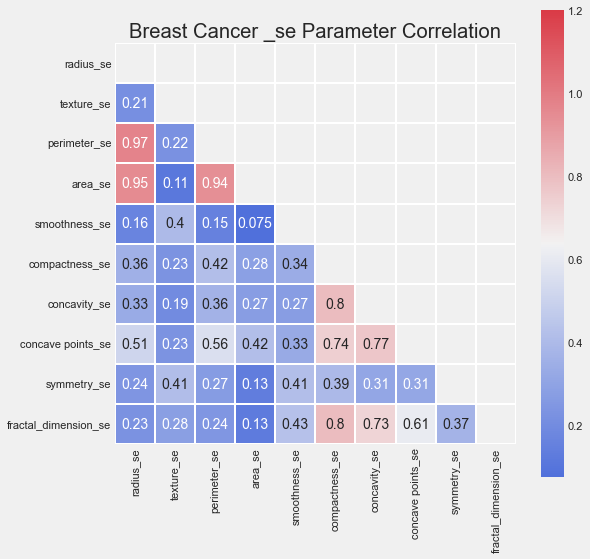

In [34]:
plt.style.use('fivethirtyeight')
corr = data_se.corr()
df, ax = plt.subplots(figsize=(8, 8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(260, 10, as_cmap=True)
plt.title('Breast Cancer _se Parameter Correlation')

sns.heatmap(corr, vmax=1.2, square='square',  
            ax=ax,annot=True, fmt='.2g',linewidths=2,
           mask = mask, cmap = cmap)
plt.show()

In [35]:
data_mean.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [36]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

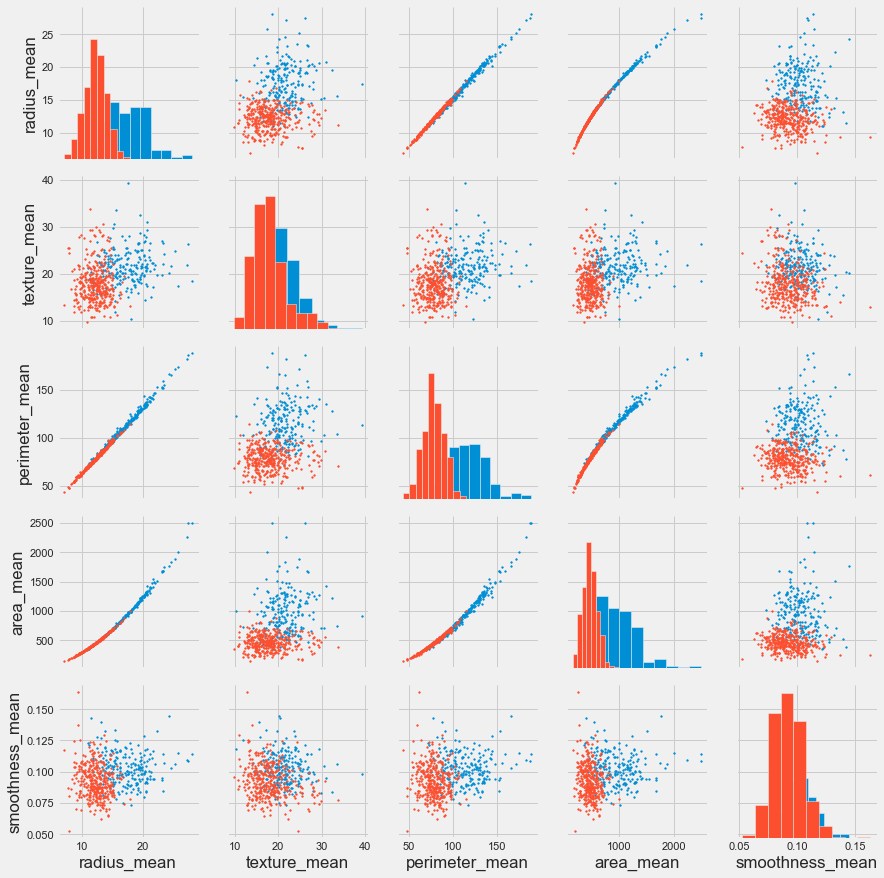

In [37]:
# df = pd.read_csv('data/data_clean.csv', index_col=False)
g = sns.PairGrid(data[[data.columns[1],data.columns[2], data.columns[3],
                     data.columns[4], data.columns[5], data.columns[6]]],  hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## Part 3

### Preprocessing the data

- Storing all the integer column values into an array
- Performing label encoding on the diagnosis column

In [38]:
## dropping the id column
data.drop('id',axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
array = data.values
X = array[:,1:31]
y = array[:,0]
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [40]:
## transforming the diagnosis column which has the lables 'M' and 'B'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Now our integer values are in X variable(Predictor Variables) and dependent variable diagnosis is in y variable

#### Performing the test train split
- Train: 67% Test: 33%

In [41]:
from sklearn.model_selection import train_test_split

##Split data set in train 67% and test 33%
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.7, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 30), (398,), (171, 30), (171,))

#### Scaling the features
- Since our data has different scales, we need to perform feature scaling to train our ML model better
- I will use the MinMax Scaler

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the  data (center around 0 and scale to remove the variance).
scaler =MinMaxScaler()
XS = scaler.fit_transform(X)

- MinMax scaler compresses all the values between 0 and 1

### Performing feature decomposition
- Since we have a lot of variables we should perform feature decomposition
- I will use the PCA or Principal Component Analysis.

In [43]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=10)
fit = pca.fit(XS)

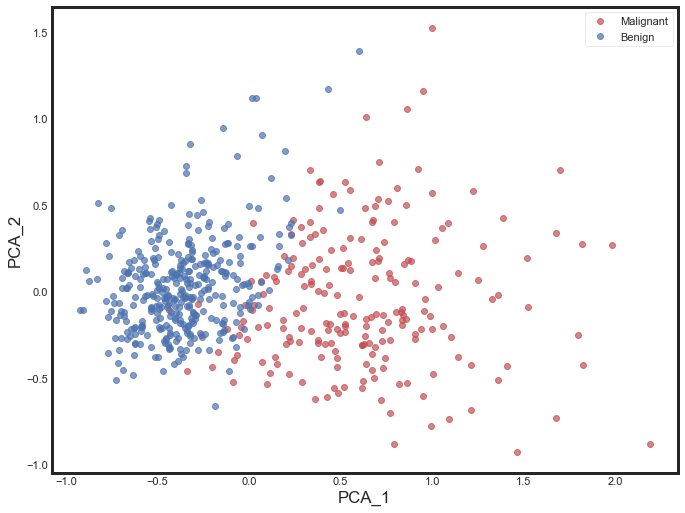

In [44]:
sns.set_style("white")
X_pca = pca.transform(XS)

PCA_data = pd.DataFrame()

PCA_data['PCA_1'] = X_pca[:,0]
PCA_data['PCA_2'] = X_pca[:,1]

plt.plot(PCA_data['PCA_1'][data.diagnosis == 'M'],PCA_data['PCA_2'][data.diagnosis == 'M'],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_data['PCA_1'][data.diagnosis == 'B'],PCA_data['PCA_2'][data.diagnosis == 'B'],'o', alpha = 0.7, color = 'b')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])
plt.show()

In [45]:
var= pca.explained_variance_ratio_
var

array([0.53097689, 0.1728349 , 0.07114442, 0.06411259, 0.04086072,
       0.03071494, 0.01580837, 0.01191472, 0.00988429, 0.00945446])

Now we need to know which components to retain, so we will use screeplot for our decision

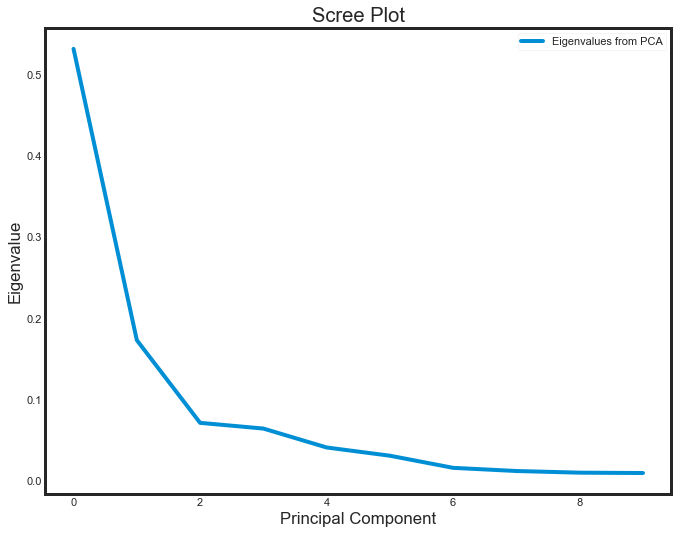

In [46]:
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

If we look at this plot the most significant change occurs at component 2. So we should retain the first three components

## Model Training using Support Vector Machine

In [47]:
import sklearn
from sklearn import svm

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

In [49]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
array = data.values
X = array[:,1:31]
y = array[:,0]

Putting the independent variables in X and the output variable in y

In [51]:
# import the label encoder for the categorical values in y
le = LabelEncoder()
y = le.fit_transform(y)

In [52]:
# scale the values in the predictor varaiable using the Standard Scaler
scaler = StandardScaler()
XS = scaler.fit_transform(X)

In [53]:
clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [54]:
classifier_score = clf.score(X_test, y_test)
print (classifier_score)

0.9298245614035088


In [55]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

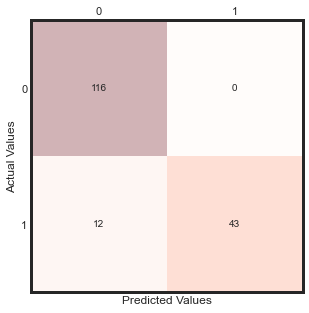

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       116
           1       1.00      0.78      0.88        55

    accuracy                           0.93       171
   macro avg       0.95      0.89      0.91       171
weighted avg       0.94      0.93      0.93       171



In [56]:
# plot the confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).

- The classifier made a total of 174 predictions (i.e 174 patients were being tested for the presence breast cancer).
- Out of those 174 cases, the classifier predicted "yes" 43 times, and "no" 128 times.
- In reality, 55 patients in the sample have the disease, and 116 patients do not.

0.9735109717868338


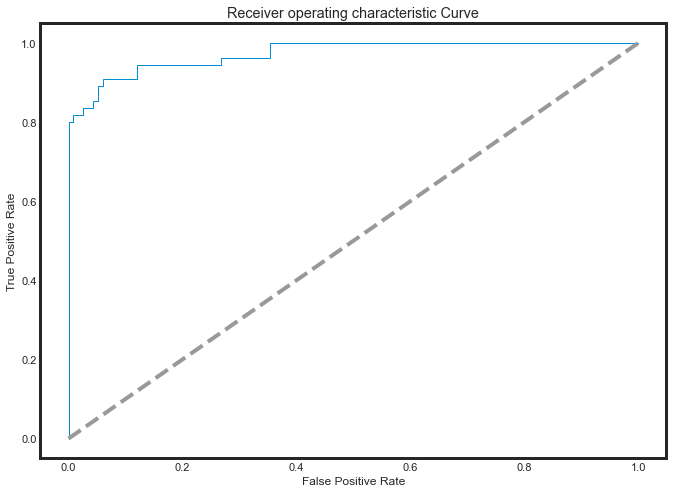

In [57]:
from sklearn.metrics import roc_curve, auc

# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
# plt.axes().set_aspect(1)

#### Let us find out the auc value for our model.

In [61]:
print(roc_auc)

0.9735109717868338


The Area Under ROC Curve is .97351 which is almost around 1 so this shows that we have achieved a good classification with our model.

### Evaluating some other classifiers

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a pipeline that standardizes the data then creates a model
#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [59]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring = 'accuracy'

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train) 
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.937179 (0.028218)
Decision Tree: 0.919679 (0.028997)
Naive Bayes: 0.937115 (0.040822)
SVM: 0.901987 (0.047020)


- 10-Fold cross-validation accuracy score for the training data for four classifiers

### Inferences and Observations

1. We achieved an accuracy of 93% using the Support Vector Machine
2. After plotting the confusion matrix we got the following information.
  - The classifier made a total of 174 predictions (i.e 174 patients were being tested for the presence breast cancer).
  - Out of those 174 cases, the classifier predicted "yes" 43 times, and "no" 128 times.
  - In reality, 55 patients in the sample have the disease, and 116 patients do not.
3. We plotted the ROC - AUC Curve for our model and then found out the AUC value. It came out to be 0.97, which is good because    our model has a good classification value.
4. I have tried to evaluate some other classifiers such as Decision Tree, Naive Bayes and SVM, using 10-fold cross validation 
   technique.
  - KNN has 93.72% accuracy
  - Decision Tree has 92% accuracy
  - Naive Bayes has 93.71 % accuracy almost the same as KNN.
  - SVM has 90% accuracy.
5. KNN and Naive Bayes have the same accuracy as SVM which is around 93%.